def plot_voldens2(ax, halo, components):
    """Adds Volumetric density to plot.
    """
    results = {}
    
    if components=="particles":
        components = ["stars", "darkmatter"]
    elif components=="all":
        components = ["stars", "darkmatter", "gas"]

    if "stars" in components:   
        rs, rhos, e_rhos, bs = halo.stars.density_profile(
            pc="bound",
            return_bins=True, 
            bins_params={"rmin": 0.08, "rmax": 50, "thicken": True},
            kw_center={"method": "adaptative", "nmin": 50},
        )
        rs2, rhos2, e_rhos2 = halo.stars.density_profile(
            pc="all", 
            bins=bs,
            new_data_params={"radius": (300, 'kpc')},
            kw_center={"method": "adaptative", "nmin": 50}
        )
        ax.errorbar(rs, rhos, yerr=e_rhos, fmt="*", ls="-", color="red", markersize=11, lw=1.2, label="stars (-bound, --all)")
        ax.errorbar(rs2, rhos2, yerr=e_rhos2, fmt="*", ls="--", color="red", markersize=11, lw=1.2)

        results["stars"] = {
            "bins" : bs,
            "r_bound": rs,
            "r_all": rs2,
            "rho_bound": rhos,
            "e_rho_bound": e_rhos,
            "rho_all": rhos2,
            "e_rho_all": e_rhos2
        }

    
    
    if "darkmatter" in components:
        r, rho, e_rho, bdm = halo.darkmatter.density_profile(
            pc="bound",
            return_bins=True, 
            bins_params={"rmin": 0.08, "rmax": 250, "thicken": False},
            kw_center={"method": "adaptative", "nmin": 300}
        )
        r2, rho2, e_rho2 = halo.darkmatter.density_profile(
            pc="all", 
            bins=bdm,
            new_data_params={"radius": (300, 'kpc')},
            kw_center={"method": "adaptative", "nmin": 300}
        
        )
        ax.errorbar(r, rho, yerr=e_rho, fmt=".", ls="-", markersize=11, lw=1.2, label="dark matter")
        ax.errorbar(r2, rho2, yerr=e_rho2, fmt=".", ls="--", color="black", markersize=11, lw=1.2)

        results["darkmatter"] = {
            "bins" : bdm,
            "r_bound": r,
            "r_all": r2,
            "rho_bound": rho,
            "e_rho_bound": e_rho,
            "rho_all": rho2,
            "e_rho_all": e_rho2
        }


    if "gas" in components:
        rg, rhog, e_rhog, bg = halo.gas.density_profile(
            pc="bound",
            center=halo.darkmatter.cm,
            return_bins=True, 
            bins_params={"rmin": 0.08, "rmax": 250, "thicken": False},
            kw_center={"method": "rcc", "rc_scale": 0.5},
        )
        rg2, rhog2, e_rhog2 = halo.gas.density_profile(
            pc="all", 
            center=halo.darkmatter.cm,
            bins=bg,
            new_data_params={"radius": (300, 'kpc')},
            kw_center={"method": "rcc", "rc_scale": 0.5},
        )
        ax.errorbar(rg, rhog, yerr=e_rhog, fmt="s", ls="-", color="green",  markersize=8, lw=1.2, label="gas")
        ax.errorbar(rg2, rhog2, yerr=e_rhog2, fmt="s", ls="--", color="green", markersize=8, lw=1.2)

        results["gas"] = {
            "bins" : bg,
            "r_bound": rg,
            "r_all": rg2,
            "rho_bound": rhog,
            "e_rho_bound": e_rhog,
            "rho_all": rhog2,
            "e_rho_all": e_rhog2
        }

    


    
    return results



def plot_dispvel2(ax, halo, components, bdm, bs, bg):
    """Adds average 3D velocity dispersion to plot.
    """
    if components=="particles":
        components = ["stars", "darkmatter"]
    elif components=="all":
        components = ["stars", "darkmatter", "gas"]

    if "darkmatter" in components:
        rv, vrms, e_vrms = halo.darkmatter.velocity_profile(
            pc="bound",
            bins=bdm,
            kw_center={"method": "adaptative", "nmin": 300}
        )
        rv2, vrms2, e_vrms2 = halo.darkmatter.velocity_profile(
            pc="all", 
            bins=bdm,
            new_data_params={"radius": (300, 'kpc')},
            kw_center={"method": "adaptative", "nmin": 300}
        
        )
        ax.errorbar(rv, vrms, yerr=e_vrms, fmt=".", ls="-", markersize=11, lw=1.2)
        ax.errorbar(rv2, vrms2, yerr=e_vrms2, fmt=".", ls="--", color="black", markersize=11, lw=1.2)    

    if "stars" in components:
        rvs, vrmss, e_vrmss = halo.stars.velocity_profile(
            pc="bound",
            bins=bs,
            kw_center={"method": "adaptative", "nmin": 50},
        )
        rvs2, vrmss2, e_vrmss2 = halo.stars.velocity_profile(
            pc="all", 
            bins=bs,
            new_data_params={"radius": (300, 'kpc')},
            kw_center={"method": "adaptative", "nmin": 50}
        )
        ax.errorbar(rvs, vrmss, yerr=e_vrmss, fmt="*", ls="-", color="red", markersize=11, lw=1.2)
        ax.errorbar(rvs2, vrmss2, yerr=e_vrmss2, fmt="*", ls="--", color="red", markersize=11, lw=1.2)    

    if "gas" in components:
        rvg, vrmsg, e_vrmsg = halo.gas.velocity_profile(
            pc="bound",
            center=halo.darkmatter.cm,
            v_center=halo.darkmatter.vcm,
            bins=bg,
            kw_center={"method": "rcc", "rc_scale": 0.5},
        )
        rvg2, vrmsg2, e_vrmsg2 = halo.gas.velocity_profile(
            pc="all", 
            center=halo.darkmatter.cm,
            v_center=halo.darkmatter.vcm,
            bins=bg,
            new_data_params={"radius": (300, 'kpc')},
            kw_center={"method": "rcc", "rc_scale": 0.5},
        )
    
        ax.errorbar(rvg, vrmsg, yerr=e_vrmsg, fmt="s", ls="-", color="green", markersize=8, lw=1.2)
        ax.errorbar(rvg2, vrmsg2, yerr=e_vrmsg2, fmt="s", ls="--", color="green", markersize=8, lw=1.2)

    return None



fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(2*12,12), sharex=True, sharey="row")
plt.subplots_adjust(hspace=0.05, wspace=0.05)

fig.suptitle(f"Averaged volumemetric density and velocity profiles, for sub_tree: {sub_id}, at different host distances:", y=0.96, fontsize=29, ha="center")

for i, rhost in enumerate([1.0, 1.5, 2.0, 3.0]):
    halo_params = selec_from_params(params, rhost)
    
    axes[0, i].set_title(f"R/Rvir={rhost}, z={halo_params['redshift']:.2f}")
  
    halo = dge.SnapshotHalo("/media/asier/EXTERNAL_USBA/Cosmo_v18/" + halo_params["fns"], center=halo_params["center"], radius=halo_params["rvir"])
    halo.compute_bound_particles(
        components=["darkmatter"], 
        method="bh", 
        weighting="softmax", 
        T="adaptative", 
        verbose=False, 
        soft=[(80, 'pc')]
    )
    halo.compute_bound_particles(
        components=["stars", "darkmatter", "gas"], 
        method="bh", 
        weighting="softmax", 
        T=0.2, 
        verbose=False, 
        refine=False, 
        cm=halo.cm, 
        vcm=halo.vcm,
        soft=[(80, 'pc'), (80, 'pc'), (123, 'pc')]
    )
    
    result_dens = plot_voldens(axes[0, i], halo, components="all")
    bins = {c : result_dens[c]["bins"] for c in ["stars", "gas", "darkmatter"]}
    axes[0, i].loglog()
    axes[0, i].set_xlim(0.05, 300)
    axes[0, i].set_ylim(1E2, 8E9)
    
    axes[0, i].axvspan(0.0001, 2 * 0.08, color="darkviolet", alpha=0.25, ls="--", lw=0.01)
    axes[0, i].axvline(2 * 0.08, color="darkviolet", ls="--", lw=2.5)
    
    axes[0, i].text(0.08, 2E2, r"$\varepsilon=80$ pc" ,ha="left", va="bottom", color="darkviolet", rotation="vertical", fontsize=20)



    
    plot_dispvel(axes[1, i], halo, "all", bins)

    axes[1, i].set_yscale("log")
    axes[1, i].set_ylim(10, 400)

    axes[1, i].axvspan(0.0001, 2 * 0.08, color="darkviolet", alpha=0.25, ls="--", lw=0.01)
    axes[1, i].axvline(2 * 0.08, color="darkviolet", ls="--", lw=2.5)
    axes[1, i].text(0.08, 11.5, r"$\varepsilon=80$ pc" ,ha="left", va="bottom", color="darkviolet", rotation="vertical", fontsize=20)
    axes[1, i].text(0.18, 350, r"$M_*$="+f"{halo.stars.bmasses.sum().value:.3e}"+r" $M_\odot$"+"\n"+r"$M_{dm}$="+f"{halo.darkmatter.bmasses.sum().value:.3e}"+r" $M_\odot$" ,ha="left", va="top", color="black", rotation="horizontal", fontsize=14)

    axes[1, i].set_xlabel(f"r [kpc]", fontsize=20)

    if i==0:
        axes[0, i].set_ylabel(r"$\rho \ [M_\odot / kpc^3]$", fontsize=20)
        axes[1, i].set_ylabel(r"$\sigma_*$ [km/s]", fontsize=20)





    fit_params = densModel.make_params(
        W0={'value': 5.5,'min': 0.1,'max': np.inf,'vary': True},
        g={'value': 1, 'vary': False},
        M={'value': halo.stars.bmasses.sum().to("Msun").value, 'vary' : False},
        rh={'value': halo_params["rh3d_stars"][0], 'min': 1E-4, 'max': 50, 'vary': True}
    )
    result_stars = densModel.fit(r=result_dens["stars"]["r_bound"], data=result_dens["stars"]["rho_bound"], params=fit_params, nan_policy="omit") 
    k_stars = limepy(phi0=result_stars.params['W0'].value, 
            g=result_stars.params['g'].value, 
            M=result_stars.params['M'].value, 
            rh=result_stars.params['rh'].value, 
            G=4.300917270038e-06
            )
    
    axes[0, i].plot(k_stars.r, k_stars.rho, color="darkblue", zorder=10, label=f"Fit to King: W0={result_stars.params['W0'].value:.2f}±{result_stars.params['W0'].stderr:.0e},  rh={result_stars.params['rh'].value:.2f}±{result_stars.params['rh'].stderr:.0e} kpc")
    axes[1, i].plot(k_stars.r, np.sqrt(k_stars.v2), color="darkblue", zorder=10)

    rho_h = unyt_quantity(*halo_params["mass"]) / (4*np.pi/3 * unyt_quantity(*halo_params["rvir"]).to("kpc")**3)
    c = (unyt_quantity(*halo_params["rvir"]).to("kpc")/unyt_quantity(*halo_params["rs"]).to("kpc")).value
    r = np.logspace(np.log10(0.05), np.log10(300), 200)
    rho_nfw = NFWc(r, rho_h, c, unyt_quantity(*halo_params["rvir"]).to("kpc").value)
    axes[0, i].plot(r, rho_nfw, color="darkorange", label=f'NFW Rockstar Fit: c={c:.2f}, rvir={unyt_quantity(*halo_params["rvir"]).to("kpc").value:.2f} kpc', zorder=9)
    
    axes[0, i].legend(fontsize=12, markerfirst=False, reverse=False)




    


























plt.show()
    

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(2*12,12), sharex=True, sharey="row")
plt.subplots_adjust(hspace=0.05, wspace=0.05)

fig.suptitle(f"Averaged surface density and velocity profiles, for sub_tree: {sub_id}, at different host distances:", y=0.96, fontsize=29, ha="center")

for i, rhost in enumerate([1.0]):
    halo_params = selec_from_params(params, rhost)
    lines_of_sight = random_vector_spherical(16, half_sphere=True)
    axes[0, i].set_title(f"R/Rvir={rhost}, z={halo_params['redshift']:.2f}")
  
    halo = dge.SnapshotHalo("/media/asier/EXTERNAL_USBA/Cosmo_v18/" + halo_params["fns"], center=halo_params["center"], radius=halo_params["rvir"])
    halo.compute_bound_particles(
        components=["darkmatter"], 
        method="bh", 
        weighting="softmax", 
        T="adaptative", 
        verbose=False, 
        soft=[(80, 'pc')]
    )
    halo.compute_bound_particles(
        components=["stars", "darkmatter", "gas"], 
        method="bh", 
        weighting="softmax", 
        T=0.2, 
        verbose=False, 
        refine=False, 
        cm=halo.cm, 
        vcm=halo.vcm,
        soft=[(80, 'pc'), (80, 'pc'), (123, 'pc')]
    )
    
    result_dens = plot_surfdens(axes[0, i], halo, lines_of_sight, components="particles")
    bins = {c : result_dens[c]["bins"] for c in ["stars", "darkmatter"]}
    axes[0, i].loglog()
    axes[0, i].set_xlim(0.05, 300)
    axes[0, i].set_ylim(1E2, 8E9)
    
    axes[0, i].axvspan(0.0001, 2 * 0.08, color="darkviolet", alpha=0.25, ls="--", lw=0.01)
    axes[0, i].axvline(2 * 0.08, color="darkviolet", ls="--", lw=2.5)
    
    axes[0, i].text(0.08, 2E2, r"$\varepsilon=80$ pc" ,ha="left", va="bottom", color="darkviolet", rotation="vertical", fontsize=20)



    
    plot_losvel(axes[1, i], halo, lines_of_sight, "particles", bins)

    axes[1, i].set_yscale("log")
    axes[1, i].set_ylim(10, 400)

    axes[1, i].axvspan(0.0001, 2 * 0.08, color="darkviolet", alpha=0.25, ls="--", lw=0.01)
    axes[1, i].axvline(2 * 0.08, color="darkviolet", ls="--", lw=2.5)
    axes[1, i].text(0.08, 11.5, r"$\varepsilon=80$ pc" ,ha="left", va="bottom", color="darkviolet", rotation="vertical", fontsize=20)
    axes[1, i].text(0.18, 350, r"$M_*$="+f"{halo.stars.bmasses.sum().value:.3e}"+r" $M_\odot$"+"\n"+r"$M_{dm}$="+f"{halo.darkmatter.bmasses.sum().value:.3e}"+r" $M_\odot$" ,ha="left", va="top", color="black", rotation="horizontal", fontsize=14)

    axes[1, i].set_xlabel(f"R [kpc]", fontsize=20)

    if i==0:
        axes[0, i].set_ylabel(r"$\Sigma \ [M_\odot / kpc^2]$", fontsize=20)
        axes[1, i].set_ylabel(r"$\sigma_*$ [km/s]", fontsize=20)





    fit_params = densModel.make_params(
        W0={'value': 5.5,'min': 0.1,'max': np.inf,'vary': True},
        g={'value': 1, 'vary': False},
        M={'value': halo.stars.bmasses.sum().to("Msun").value, 'vary' : False},
        rh={'value': halo_params["rh3d_stars"][0], 'min': 1E-4, 'max': 50, 'vary': True}
    )
    result_stars = surfModel.fit(r=result_dens["stars"]["r_bound"], data=result_dens["stars"]["rho_bound"], params=fit_params, nan_policy="omit") 
    k_stars = limepy(phi0=result_stars.params['W0'].value, 
            g=result_stars.params['g'].value, 
            M=result_stars.params['M'].value, 
            rh=result_stars.params['rh'].value, 
            G=4.300917270038e-06,
            project=True
            )
    
    axes[0, i].plot(k_stars.r, k_stars.Sigma, color="darkblue", zorder=10, label=f"Fit to King: W0={result_stars.params['W0'].value:.2f}±{result_stars.params['W0'].stderr:.0e},  rh={result_stars.params['rh'].value:.2f}±{result_stars.params['rh'].stderr:.0e} kpc")
    #axes[1, i].plot(k_stars.r, np.sqrt(k_stars.v2), color="darkblue", zorder=10)





    axes[0, i].legend(fontsize=12, markerfirst=False, reverse=False)


plt.show()

In [1]:
import yt
import numpy as np
import pandas as pd
from unyt import unyt_array, unyt_quantity
import matplotlib.pyplot as plt

import src.explorer as dge
from src.explorer.class_methods import load_ftable

pd.options.display.max_columns = 1000

In [2]:
from limepy import limepy

In [18]:
k = limepy(
    phi0=10,
    g=1,
    M=8.3E5,
    rh=0.67,
    G=4.300917270038e-06
)

(100.0, 1000000000.0)

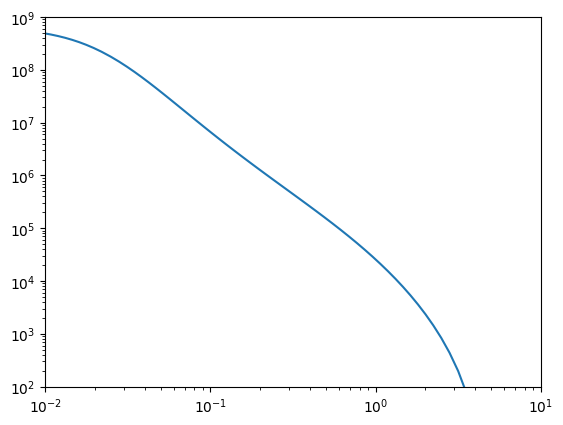

In [19]:
plt.loglog(k.r, k.rho)
plt.xlim(0.01,)
plt.ylim(1E2,1E9)

In [2]:
dge.config.code = "ART"

In [3]:
candidates = pd.read_csv("/home/asier/StructuralAnalysis/satellite_tables/ART_satellitesV5_Rvir1.0.csv")
candidates1_5 = pd.read_csv("/home/asier/StructuralAnalysis/satellite_tables/ART_satellitesV5_Rvir1.5.csv")
candidates2 = pd.read_csv("/home/asier/StructuralAnalysis/satellite_tables/ART_satellitesV5_Rvir2.0.csv")
candidates3 = pd.read_csv("/home/asier/StructuralAnalysis/satellite_tables/ART_satellitesV5_Rvir3.0.csv")

In [4]:
candidates

,Sub_tree_id,Halo_ID,Snapshot,Redshift,Time,uid,desc_uid,mass,num_prog,virial_radius,scale_radius,vrms,vmax,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z,A[x],A[y],A[z],b_to_a,c_to_a,T_U,Tidal_Force,Tidal_ID,Secondary,Halo_at_z0,TreeNum,R/Rvir,has_stars,has_galaxy,delta_rel,stellar_mass,rh_stars_physical,rh_dm_physical,e_rh_stars_physical,e_rh_dm_physical,rh3D_stars_physical,rh3D_dm_physical,Mdyn,sigma*,e_sigma*
0,213.0,251.0,204.0,2.690718,2.489365,1873547.0,1884502.0,3.175214e+10,1.0,103.712250,24.309118,86.449997,72.230003,41936.652344,44873.421875,43054.273438,-76.870003,264.630005,183.059998,-0.531580,3.305980,3.12276,0.819020,0.614180,0.7750,1.37861,1872910.0,False,3306322.0,0.0,1.059703,True,True,0.006443,5.344093e+08,1.207411,9.370930,0.067425,0.364927,1.602015,12.852203,1.312790e+09,36.539789,1.497076
1,236.0,307.0,198.0,2.846597,2.341928,1806601.0,1817761.0,1.344159e+09,1.0,36.183758,3.069801,33.290001,31.250000,41990.898438,44814.984375,43028.054688,-17.090000,235.529999,166.570007,1.538960,0.338240,0.59782,0.800830,0.737900,0.6796,1.36375,1805781.0,False,3306322.0,0.0,1.073105,True,True,0.002626,8.411013e+06,0.600204,2.339168,0.035130,0.099266,0.836496,3.190182,1.109349e+08,14.293812,0.871936
2,239.0,606.0,233.0,2.006524,3.361662,2184505.0,2194410.0,3.900285e+10,3.0,110.267799,18.638176,84.419998,73.430000,41553.203125,45539.804688,43631.824219,-18.200001,72.550003,-60.580002,5.413600,0.863580,-0.30982,0.947410,0.554070,0.7288,1.41918,2184120.0,False,3306322.0,0.0,1.021655,True,True,0.005370,4.646946e+08,1.678241,11.570486,0.164685,0.619519,2.369281,15.805497,1.762289e+09,35.800586,2.743289
3,262.0,210.0,220.0,2.285043,2.953958,2050221.0,2061409.0,2.763533e+09,1.0,45.799145,9.170940,33.689999,31.270000,41598.105469,45108.851562,43449.558594,55.820000,286.179993,12.580000,1.571220,0.618030,-0.28034,0.817080,0.592330,0.6431,1.36857,2048780.0,False,3306322.0,0.0,1.071247,True,True,0.006455,3.345175e+06,0.649454,4.426529,0.112571,0.265356,0.872687,6.093876,1.247274e+08,17.223332,1.712590
4,277.0,507.0,220.0,2.285043,2.953958,2050344.0,2061533.0,7.753561e+09,1.0,64.588318,9.192307,50.430000,46.139999,41829.589844,45352.710938,43511.355469,-226.500000,106.919998,-16.530001,2.582760,-1.028530,0.47128,0.896360,0.686410,0.6720,1.39306,2048780.0,False,3306322.0,0.0,1.046560,True,True,0.007232,3.041763e+07,0.793314,5.878017,0.051939,0.267455,1.042648,7.816320,2.466890e+08,19.587889,0.729519
5,987.0,399.0,217.0,2.342469,2.879901,2018657.0,2029728.0,2.574074e+09,1.0,44.752136,7.388888,34.209999,31.950001,41801.566406,45124.675781,43079.761719,-70.320000,37.740002,268.440002,1.214560,-0.990900,-0.32537,0.913850,0.629610,0.6577,1.41458,2015401.0,False,3306322.0,0.0,1.025290,True,True,0.004403,4.466870e+06,0.423212,4.071500,0.019050,0.063982,0.576417,5.514218,6.643923e+07,13.435975,0.549275
6,2435.0,470.0,191.0,2.998880,2.211280,1729128.0,1740770.0,1.011823e+09,1.0,32.944447,7.907408,27.400000,24.410000,41976.628906,44857.253906,43372.667969,-215.449997,79.300003,-15.650000,1.033010,1.087340,-0.11832,0.892820,0.836300,0.7829,1.41265,1725945.0,False,3306322.0,0.0,1.026828,True,True,0.005131,1.665523e+06,0.380198,2.682658,0.011118,0.041602,0.517140,3.708001,3.575260e+07,9.086195,0.817437
7,5888.0,8837.0,240.0,1.879521,3.578947,2254359.0,2263980.0,3.643875e+08,1.0,23.159544,1.072650,23.930000,20.100000,41772.011719,45650.386719,43671.625000,-264.170013,96.669998,44.590000,0.344277,-0.488753,0.64150,0.768132,0.544067,0.8331,10.83942,2254351.0,False,3306322.0,0.0,1.032206,True,True,0.000065,2.797915e+06,1.305794,3.712810,0.054473,0.379393,1.458550,4.903421,1.948666e+08,16.106950,0.580665
8,7788.0,772.0,267.0,1.281803,4.988989,2508737.0,2517238.0,2.952991e+10,4.0,98.613953,11.839031,68.220001,63.060001,41445.640625,46221.472656,44027.125000,-240.309998,184.199997,-53.130001,0.489780,-2.762500,2.93865,0.752420,0.667500,0.6796,1.42124,2506832.0,False,3306322.0,0.0,1.018628,True,True,0.008882,1.285473e+08,1.531171,11.94

In [8]:
snapequiv = load_ftable("./ART_equivalence.dat")

## Trambolikeo

In [7]:
snapequiv = load_ftable("./ART_equivalence.dat")

r_rvir = [1.0, 1.5, 2.0, 3.0]

sub_id = 213
params = {
    "sub_id": sub_id,
    "fns": [],
    "R/Rvir": [1.0, 1.5, 2.0, 3.0],
    "redshift": [],
    "mass": [],
    "center": [],
    "center_vel": [],
    "rvir": [],
    "rs": [],
    "vmax": [],
    "vrms": [],
    "rh3d_stars": [],
    "rh3d_dm": []
}
for c in [candidates, candidates1_5, candidates2, candidates3]:
    halo = c[c["Sub_tree_id"] == sub_id]
    z = halo["Redshift"].values[0]
    mass = (halo["mass"].values[0], "Msun")
    center = (halo[['position_x', 'position_y', 'position_z']].values[0].astype(float) / (1+z), 'kpc')
    center_vel =  (halo[['velocity_x', 'velocity_y', 'velocity_z']].values[0].astype(float), 'km/s')
    rvir = (halo['virial_radius'].values[0] / (1+z), 'kpc')
    rs = (halo['scale_radius'].values[0] / (1+z), 'kpc')
    vmax = (halo['vmax'].values[0], 'km/s')
    vrms = (halo['vrms'].values[0], 'km/s')
    rh3d_stars = (halo['rh3D_stars_physical'].values[0], 'kpc')
    rh3d_dm = (halo['rh3D_dm_physical'].values[0], 'kpc')
    
    fn = snapequiv[snapequiv['snapshot'] == halo['Snapshot'].values[0]]['snapname'].values[0]
    print(f"Appending SubTree {sub_id} data to params. File: {fn}")
    params["fns"].append(fn)
    params["redshift"].append(z)
    params["mass"].append(mass)
    params["center"].append(center)
    params["center_vel"].append(center_vel)
    params["rvir"].append(rvir)
    params["rs"].append(rs)
    params["vmax"].append(vmax)
    params["vrms"].append(vrms)
    params["rh3d_stars"].append(rh3d_stars)
    params["rh3d_dm"].append(rh3d_dm)

Appending SubTree 213 data to params. File: 10MpcBox_csf512_02653.d
Appending SubTree 213 data to params. File: 10MpcBox_csf512_02624.d
Appending SubTree 213 data to params. File: 10MpcBox_csf512_02573.d
Appending SubTree 213 data to params. File: 10MpcBox_csf512_02425.d


In [6]:
params

{'sub_id': 236,
 'fns': ['10MpcBox_csf512_02617.d',
  '10MpcBox_csf512_02573.d',
  '10MpcBox_csf512_02519.d',
  '10MpcBox_csf512_02431.d'],
 'R/Rvir': [1.0, 1.5, 2.0, 3.0],
 'redshift': [2.84659743309021,
  3.0311203002929688,
  3.2826552391052246,
  3.730592727661133],
 'mass': [(1344159488.0, 'Msun'),
  (1460113920.0, 'Msun'),
  (1679487232.0, 'Msun'),
  (2213675264.0, 'Msun')],
 'center': [(array([10916.37457985, 11650.55224898, 11186.00410777]), 'kpc'),
  (array([10418.45923004, 11079.60162539, 10650.01319159]), 'kpc'),
  (array([ 9808.29156324, 10382.49542748,  9999.34837802]), 'kpc'),
  (array([8897.39934916, 9330.50855962, 9014.01313849]), 'kpc')],
 'center_vel': [(array([-17.09000015, 235.52999878, 166.57000732]), 'km/s'),
  (array([ -2.50999999, 246.3500061 , 141.47000122]), 'km/s'),
  (array([-24.70000076, 251.36000061, 134.63999939]), 'km/s'),
  (array([-106.84999847,  258.07998657,  154.75999451]), 'km/s')],
 'rvir': [(9.406692125022754, 'kpc'),
  (9.237603786761854, 'kpc')

In [6]:
def select_from_params(pars, rvir):
    i = np.argwhere(np.array(pars["R/Rvir"]) == rvir)[0][0]
    return {key: (val[i] if key != "sub_id" else val) for key, val in pars.items()}


In [7]:
from lmfit import Model, Parameters, fit_report
from limepy import limepy

from scipy.interpolate import PchipInterpolator, Akima1DInterpolator
def KingProfileIterp(r, W0, g, M, rh):
    """Produces a sample of a Lowered isothermal model with parameters W0, g, M and rh using LIMEPY 
    and interpolates the result for a specified r.
    """
    k = limepy(phi0=W0, g=g, M=M, rh=rh, G=4.300917270038e-06)
    evals = np.interp(r, xp=k.r, fp=k.rho)
    return evals #in Msun/kpc**3

def KingProfileIterp_surf(r, W0, g, M, rh):
    """Produces a sample of a Lowered isothermal model with parameters W0, g, M and rh using LIMEPY 
    and interpolates the result for a specified r.
    """
    k = limepy(phi0=W0, g=g, M=M, rh=rh, G=4.300917270038e-06, project=True)
    evals = np.interp(r, xp=k.r, fp=k.Sigma)
    return evals #in Msun/kpc**3

def plummer(r, M, a):
    """Plummer model
    """
    return 3 * M / ( 4 * np.pi * a ** 3 ) * ( 1 + (r/a)**2 ) ** (-5/2)
    
densModel = Model(KingProfileIterp, independent_vars=['r'])
surfModel = Model(KingProfileIterp_surf, independent_vars=['r'])
plummerModel = Model(plummer, independent_vars=['r'])

In [8]:
def plot_voldens(ax, halo, components):
    """Adds averaged surface density (both 'all' and 'bound') to plot over multiple lines of sight.
    """
    bins_params_all = {
        "stars": {"rmin": 0.08, "rmax": 50, "thicken": True},
        "darkmatter": {"rmin": 0.08, "rmax": 250, "thicken": False},
        "gas": {"rmin": 0.08, "rmax": 250, "thicken": False}
    }
    kw_center_all = {
        "stars": {"method": "adaptative", "nmin": 50},
        "darkmatter": {"method": "adaptative", "nmin": 300},
        "gas": {"method": "rcc", "rc_scale": 0.5}
    }
    
    results = {}
    
    if components == "particles":
        components = ["stars", "darkmatter"]
    elif components == "all":
        components = ["stars", "darkmatter", "gas"]
        
    sp = halo._data.ds.sphere(
        halo.sp_center, 
        (300, 'kpc')
    )
    for component in components: 
        component_object = getattr(halo, component)

        if component == "gas":
            dm_object = getattr(halo, "darkmatter")
            center = dm_object.refined_center6d(method="adaptative", nmin=300)[0]
        else:
            center = None
                
            
        r_bound, rho_bound, e_rho_bound, bins = component_object.density_profile(
            pc="bound",
            center=center,
            return_bins=True,
            bins_params=bins_params_all[component],
            kw_center=kw_center_all[component]
        )
        r_all, rho_all, e_rho_all = component_object.density_profile(
            pc="all",
            center=center,
            bins=bins,
            new_data_params={"sp": sp, "radius": (300, "kpc")},
            kw_center=kw_center_all[component]
        )



        
        color = {"stars": "red", "darkmatter": "black", "gas": "green"}[component]
        marker = {"stars": "*", "darkmatter": ".", "gas": "s"}[component]
        label = {"stars": "stars (-bound, --all)", "darkmatter": "dark matter", "gas" : "gas"}[component]
        markersize = {"stars": 11, "darkmatter": 11, "gas": 7}[component]
        
        ax.errorbar(r_bound, rho_bound, yerr=e_rho_bound, fmt=marker, ls="-", color=color, markersize=markersize, lw=1.2, label=label)
        ax.errorbar(r_all, rho_all, yerr=e_rho_all, fmt=marker, ls="--", color=color, markersize=markersize, lw=1.2)



        
        results[component] = {
            "bins": bins,
            "r_bound": r_bound,
            "rho_bound": rho_bound,
            "e_rho_bound": e_rho_bound,
            "r_all": r_all,
            "rho_all": rho_all,
            "e_rho_all": e_rho_all,
        }

    return results



def plot_dispvel(ax, halo, components, bins):
    """Adds average 3D velocity dispersion to plot.
    """

    bins_params_all = {
        "stars": {"rmin": 0.08, "rmax": 50, "thicken": True},
        "darkmatter": {"rmin": 0.08, "rmax": 250, "thicken": False},
        "gas": {"rmin": 0.08, "rmax": 250, "thicken": False}
    }
    kw_center_all = {
        "stars": {"method": "adaptative", "nmin": 50},
        "darkmatter": {"method": "adaptative", "nmin": 300},
        "gas": {"method": "rcc", "rc_scale": 0.5}
    }
    
    results = {}
    
    if components == "particles":
        components = ["stars", "darkmatter"]
    elif components == "all":
        components = ["stars", "darkmatter", "gas"]

    sp = halo._data.ds.sphere(
        halo.sp_center, 
        (300, 'kpc')
    )
    for component in components: 
        component_object = getattr(halo, component)

        if component == "gas":
            dm_object = getattr(halo, "darkmatter")
            center, v_center = dm_object.refined_center6d(method="adaptative", nmin=300)
        else:
            center, v_center = None, None
                   

        r_bound, vrms_bound, e_vrms_bound = component_object.velocity_profile(
            pc="bound",
            center=center,
            v_center=v_center,
            bins=bins[component],
            kw_center=kw_center_all[component]
        )
        r_all, vrms_all, e_vrms_all = component_object.velocity_profile(
            pc="all", 
            center=center,
            v_center=v_center,
            bins=bins[component],
            new_data_params={"sp": sp,"radius": (300, 'kpc')},
            kw_center=kw_center_all[component]
        
        )

        
        color = {"stars": "red", "darkmatter": "black", "gas": "green"}[component]
        marker = {"stars": "*", "darkmatter": ".", "gas": "s"}[component]
        label = {"stars": "stars (-bound, --all)", "darkmatter": "dark matter", "gas" : "gas"}[component]
        markersize = {"stars": 11, "darkmatter": 11, "gas": 7}[component]
        
        ax.errorbar(r_bound, vrms_bound, yerr=e_vrms_bound, fmt=marker, ls="-", color=color, markersize=markersize, lw=1.2)
        ax.errorbar(r_all, vrms_all, yerr=e_vrms_all, fmt=marker, ls="--", color=color, markersize=markersize, lw=1.2)    


        
        results[component] = {
            "bins": bins[component],
            "r_bound": r_bound,
            "vrms_bound": vrms_bound,
            "e_vrms_bound": e_vrms_bound,
            "r_all": r_all,
            "vrms_all": vrms_all,
            "e_vrms_all": e_vrms_all,
        }

    return results


In [9]:
def plot_surfdens(ax, halo, lines_of_sight, components):
    """Adds averaged surface density (both 'all' and 'bound') to plot over multiple lines of sight."""
    from tqdm import tqdm
    bins_params_all = {
        "stars": {"rmin": 0.08, "rmax": 50, "thicken": True},
        "darkmatter": {"rmin": 0.08, "rmax": 250, "thicken": False},
        "gas": {"rmin": 0.08, "rmax": 250, "thicken": False}
    }
    kw_center_all = {
        "stars": {"method": "adaptative", "nmin": 50},
        "darkmatter": {"method": "adaptative", "nmin": 300},
        "gas": {"method": "rcc", "rc_scale": 0.5}
    }
    
    results = {}
    
    if components == "particles":
        components = ["stars", "darkmatter"]
    elif components == "all":
        components = ["stars", "darkmatter", "gas"]

    sp = halo._data.ds.sphere(
        halo.sp_center, 
        (300, 'kpc')
    )
    for component in components:
        rhos_bound_all = []
        rhos_all_all = []
        
        bins = None  
        component_object = getattr(halo, component)

        if component == "gas":
            dm_object = getattr(halo, "darkmatter")
            center = dm_object.refined_center6d(method="adaptative", nmin=300)[0]
        else:
            center = None
               
                
        for i in tqdm(range(len(lines_of_sight)), desc=f"Projecting {component} for density"):
            los = lines_of_sight[i]
            halo.set_line_of_sight(los.tolist())
            
            r_bound, rho_bound, e_rho_bound, bins_bound = component_object.density_profile(
                pc="bound",
                center=center,
                bins=bins,
                projected=True,
                return_bins=True,
                bins_params=bins_params_all[component],
                kw_center=kw_center_all[component]
            )
            rhos_bound_all.append(rho_bound)
            
            if bins is None:
                bins = bins_bound

            r_all, rho_all, e_rho_all = component_object.density_profile(
                pc="all",
                center=center,
                bins=bins,
                projected=True,
                new_data_params={"sp": sp, "radius": (300, "kpc")},
                kw_center=kw_center_all[component]
            )
            rhos_all_all.append(rho_all)
        
        # Convert to numpy arrays for averaging
        rhos_bound_all = np.array(rhos_bound_all)
        rhos_all_all = np.array(rhos_all_all)

        # Compute averages
        rho_bound_avg = np.mean(rhos_bound_all, axis=0)
        rho_all_avg = np.mean(rhos_all_all, axis=0)

        # Compute uncertainties (standard deviations)
        rho_bound_std = np.std(rhos_bound_all, axis=0)
        rho_all_std = np.std(rhos_all_all, axis=0)

        color = {"stars": "red", "darkmatter": "black", "gas": "green"}[component]
        marker = {"stars": "*", "darkmatter": ".", "gas": "s"}[component]
        label = {"stars": "stars (-bound, --all)", "darkmatter": "dark matter", "gas" : "gas"}[component]
        markersize = {"stars": 11, "darkmatter": 11, "gas": 7}[component]
        
        ax.errorbar(r_bound, rho_bound_avg, yerr=rho_bound_std, fmt=marker, ls="-", color=color, markersize=markersize, lw=1.2, label=label)
        ax.errorbar(r_all, rho_all_avg, yerr=rho_all_std, fmt=marker, ls="--", color=color, markersize=markersize, lw=1.2)

        results[component] = {
            "bins": bins,
            "r_bound": r_bound,
            "rho_bound": rho_bound_avg,
            "rho_bound_std": rho_bound_std,
            "r_all": r_all,
            "rho_all": rho_all_avg,
            "rho_all_std": rho_all_std,
        }

    return results


def plot_losvel(ax, halo, lines_of_sight, components, bins, velocity_projection):
    """Adds averaged surface density (both 'all' and 'bound') to plot over multiple lines of sight."""
    from tqdm import tqdm
    bins_params_all = {
        "stars": {"rmin": 0.08, "rmax": 50, "thicken": True},
        "darkmatter": {"rmin": 0.08, "rmax": 250, "thicken": False},
        "gas": {"rmin": 0.08, "rmax": 250, "thicken": False}
    }
    kw_center_all = {
        "stars": {"method": "adaptative", "nmin": 50},
        "darkmatter": {"method": "adaptative", "nmin": 300},
        "gas": {"method": "rcc", "rc_scale": 0.5}
    }
    
    results = {}
    
    if components == "particles":
        components = ["stars", "darkmatter"]
    elif components == "all":
        components = ["stars", "darkmatter", "gas"]

    sp = halo._data.ds.sphere(
        halo.sp_center, 
        (300, 'kpc')
    )
    for component in components:
        vlos_bound_all = []
        vlos_all_all = []
        
        component_object = getattr(halo, component)

        if component == "gas":
            dm_object = getattr(halo, "darkmatter")
            center, v_center = dm_object.refined_center6d(method="adaptative", nmin=300)
        else:
            center, v_center = None, None
               
        
        for i in tqdm(range(len(lines_of_sight)), desc=f"Projecting {component} for los-vel"):
            los = lines_of_sight[i]
            halo.set_line_of_sight(los.tolist())
            
            r_bound, vlos_bound, _ = component_object.velocity_profile(
                pc="bound",
                center=center,
                v_center=v_center,
                bins=bins[component],
                projected=velocity_projection,
                bins_params=bins_params_all[component],
                kw_center=kw_center_all[component]
            )
            vlos_bound_all.append(vlos_bound)
            


            r_all, vlos_all, _ = component_object.velocity_profile(
                pc="all",
                center=center,
                v_center=v_center,
                bins=bins[component],
                projected=velocity_projection,
                new_data_params={"sp": sp, "radius": (300, "kpc")},
                kw_center=kw_center_all[component]
            )
            vlos_all_all.append(vlos_all)
        
        # Convert to numpy arrays for averaging
        vlos_bound_all = np.array(vlos_bound_all)
        vlos_all_all = np.array(vlos_all_all)

        # Compute averages
        vlos_bound_avg = np.mean(vlos_bound_all, axis=0)
        vlos_all_avg = np.mean(vlos_all_all, axis=0)

        # Compute uncertainties (standard deviations)
        vlos_bound_std = np.std(vlos_bound_all, axis=0)
        vlos_all_std = np.std(vlos_all_all, axis=0)

        color = {"stars": "red", "darkmatter": "black", "gas": "green"}[component]
        marker = {"stars": "*", "darkmatter": ".", "gas": "s"}[component]
        label = {"stars": "stars (-bound, --all)", "darkmatter": "dark matter", "gas" : "gas"}[component]
        markersize = {"stars": 11, "darkmatter": 11, "gas": 7}[component]
        
        ax.errorbar(r_bound, vlos_bound_avg, yerr=vlos_bound_std, fmt=marker, ls="-", color=color, markersize=markersize, lw=1.2)
        ax.errorbar(r_all, vlos_all_avg, yerr=vlos_all_std, fmt=marker, ls="--", color=color, markersize=markersize, lw=1.2)

        results[component] = {
            "bins": bins[component],
            "r_bound": r_bound,
            "vlos_bound": vlos_bound_avg,
            "vlos_bound_std": vlos_bound_std,
            "r_all": r_all,
            "vlos_all": vlos_all_avg,
            "vlos_all_std": vlos_all_std,
        }

    return results



In [10]:
import smplotlib
from src.explorer.class_methods import NFWc

plt.rcParams['axes.linewidth'] = 1.1
plt.rcParams['xtick.major.width'] = 1.1
plt.rcParams['xtick.minor.width'] = 1.1
plt.rcParams['ytick.major.width'] = 1.1
plt.rcParams['ytick.minor.width'] = 1.1

plt.rcParams['xtick.major.size'] = 7 * 1.5
plt.rcParams['ytick.major.size'] = 7 * 1.5

plt.rcParams['xtick.minor.size'] = 5 
plt.rcParams['ytick.minor.size'] = 5 

yt : [INFO     ] 2024-12-18 15:28:29,137 discovered particle_header:/media/asier/EXTERNAL_USBA/Cosmo_v18/PMcrd_02617.DAT
yt : [INFO     ] 2024-12-18 15:28:29,137 discovered particle_data:/media/asier/EXTERNAL_USBA/Cosmo_v18/PMcrs0_02617.DAT
yt : [INFO     ] 2024-12-18 15:28:29,137 discovered particle_stars:/media/asier/EXTERNAL_USBA/Cosmo_v18/stars_02617.dat
yt : [INFO     ] 2024-12-18 15:28:29,139 Using root level of 14
yt : [INFO     ] 2024-12-18 15:28:29,139 Discovered 7 species of particles
yt : [INFO     ] 2024-12-18 15:28:29,140 Particle populations:  13330288   1432362    598765    314898    206550   2064487    556919 
yt : [INFO     ] 2024-12-18 15:28:29,160 Max level is 12
yt : [INFO     ] 2024-12-18 15:28:29,183 Parameters: current_time              = 2.353700444492601 Gyr
yt : [INFO     ] 2024-12-18 15:28:29,183 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-12-18 15:28:29,183 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 20

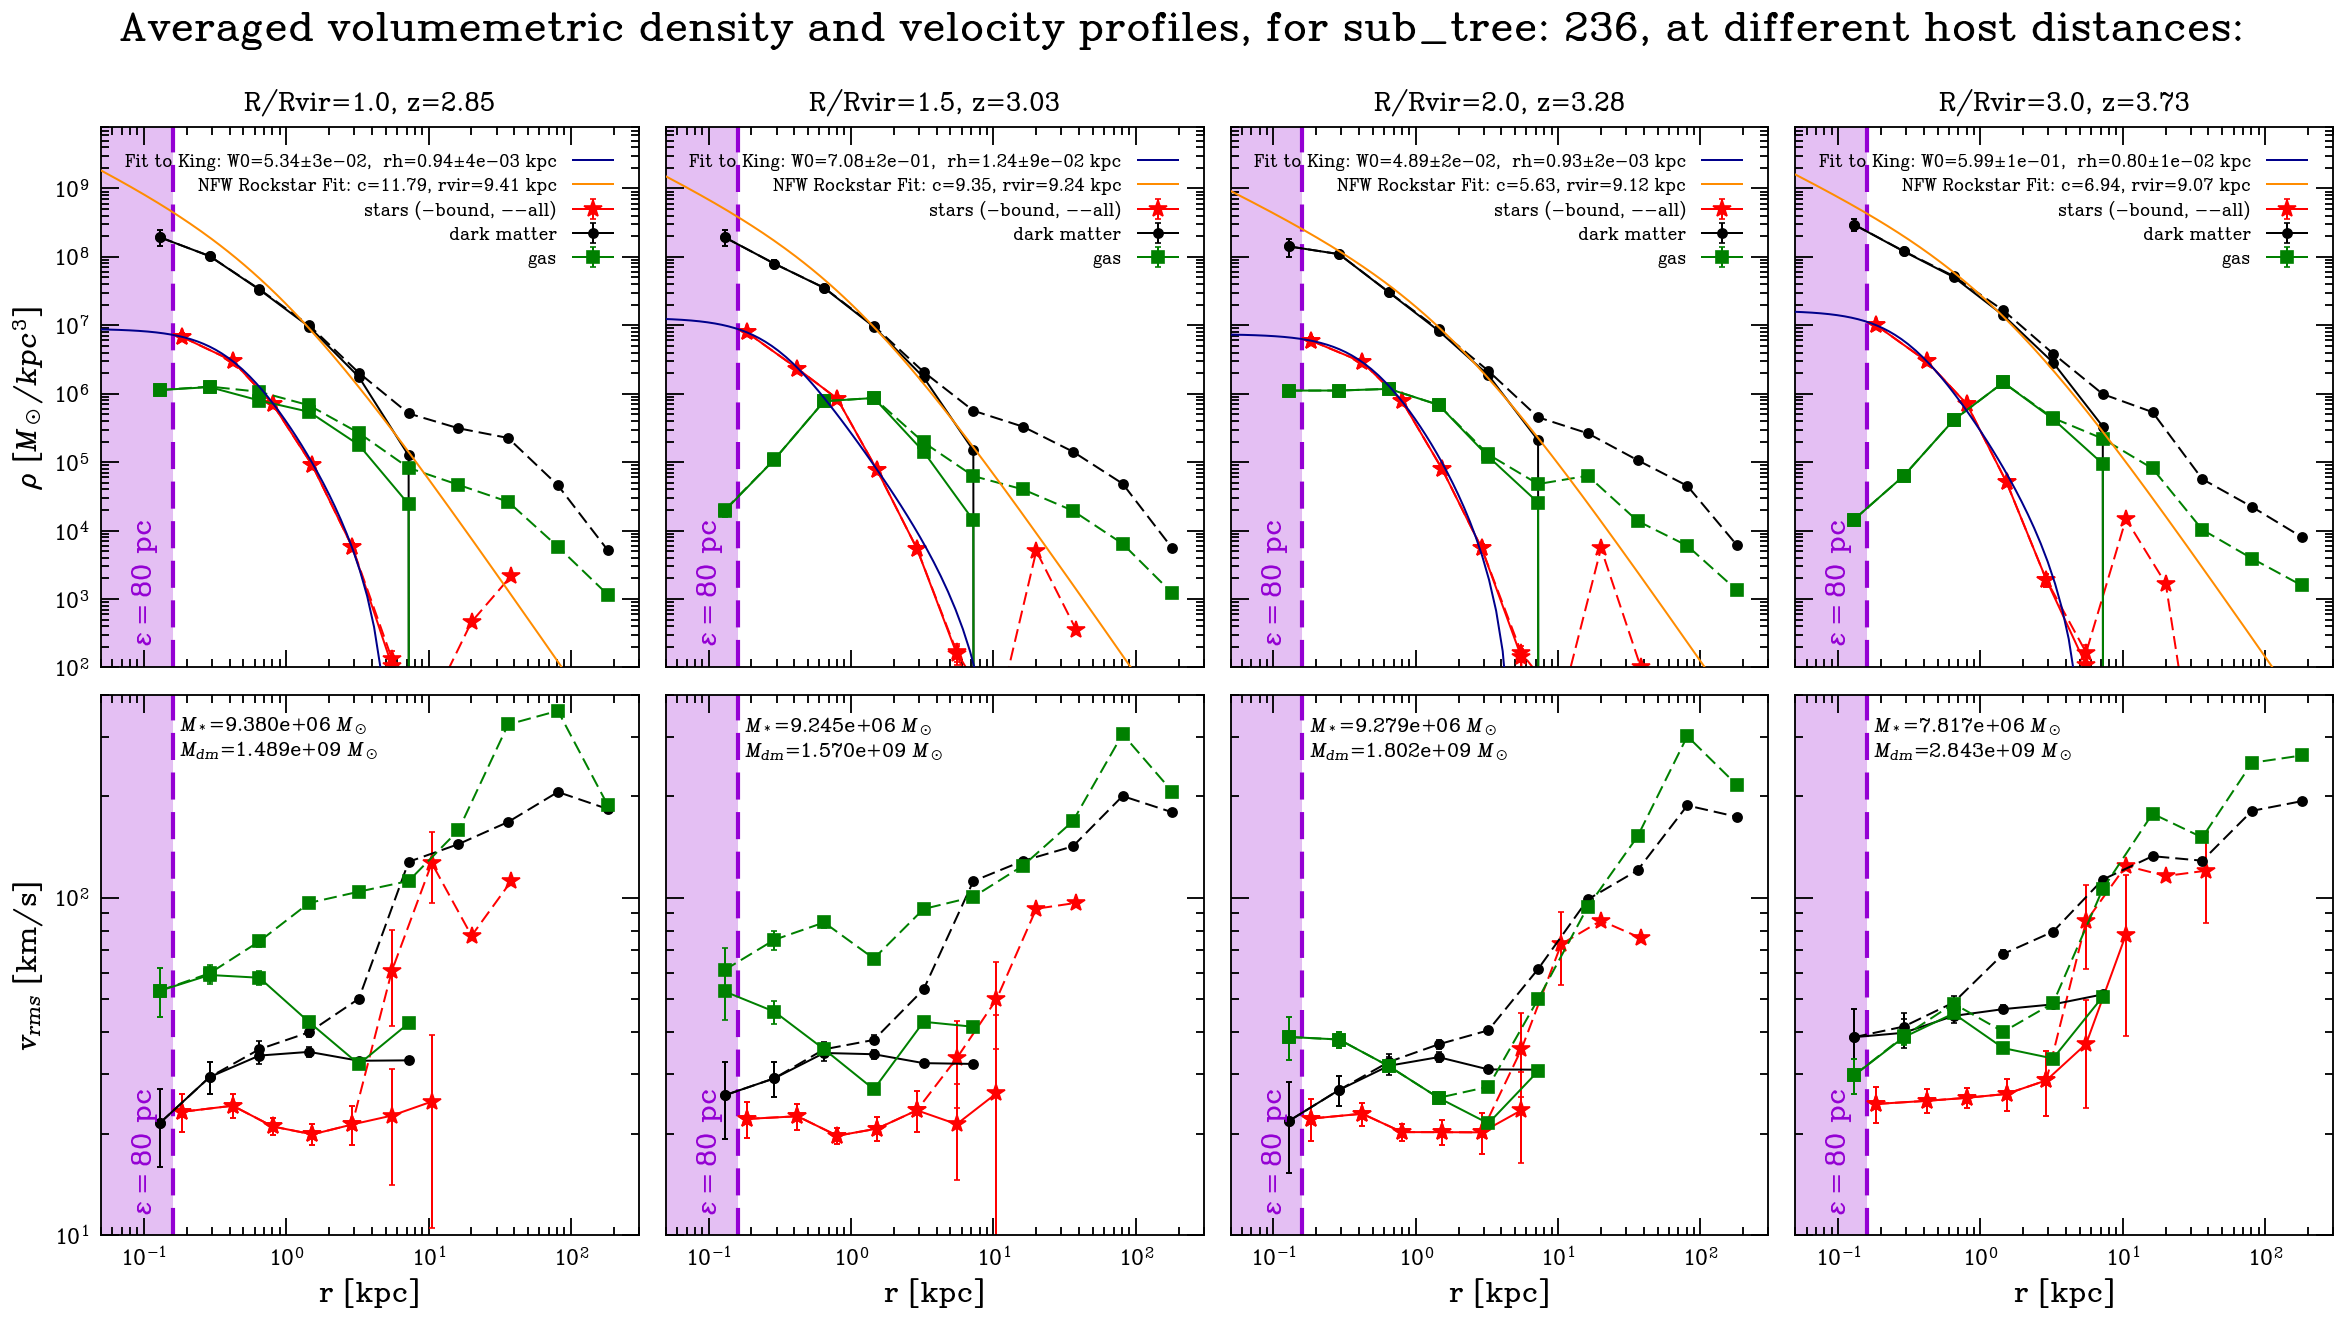

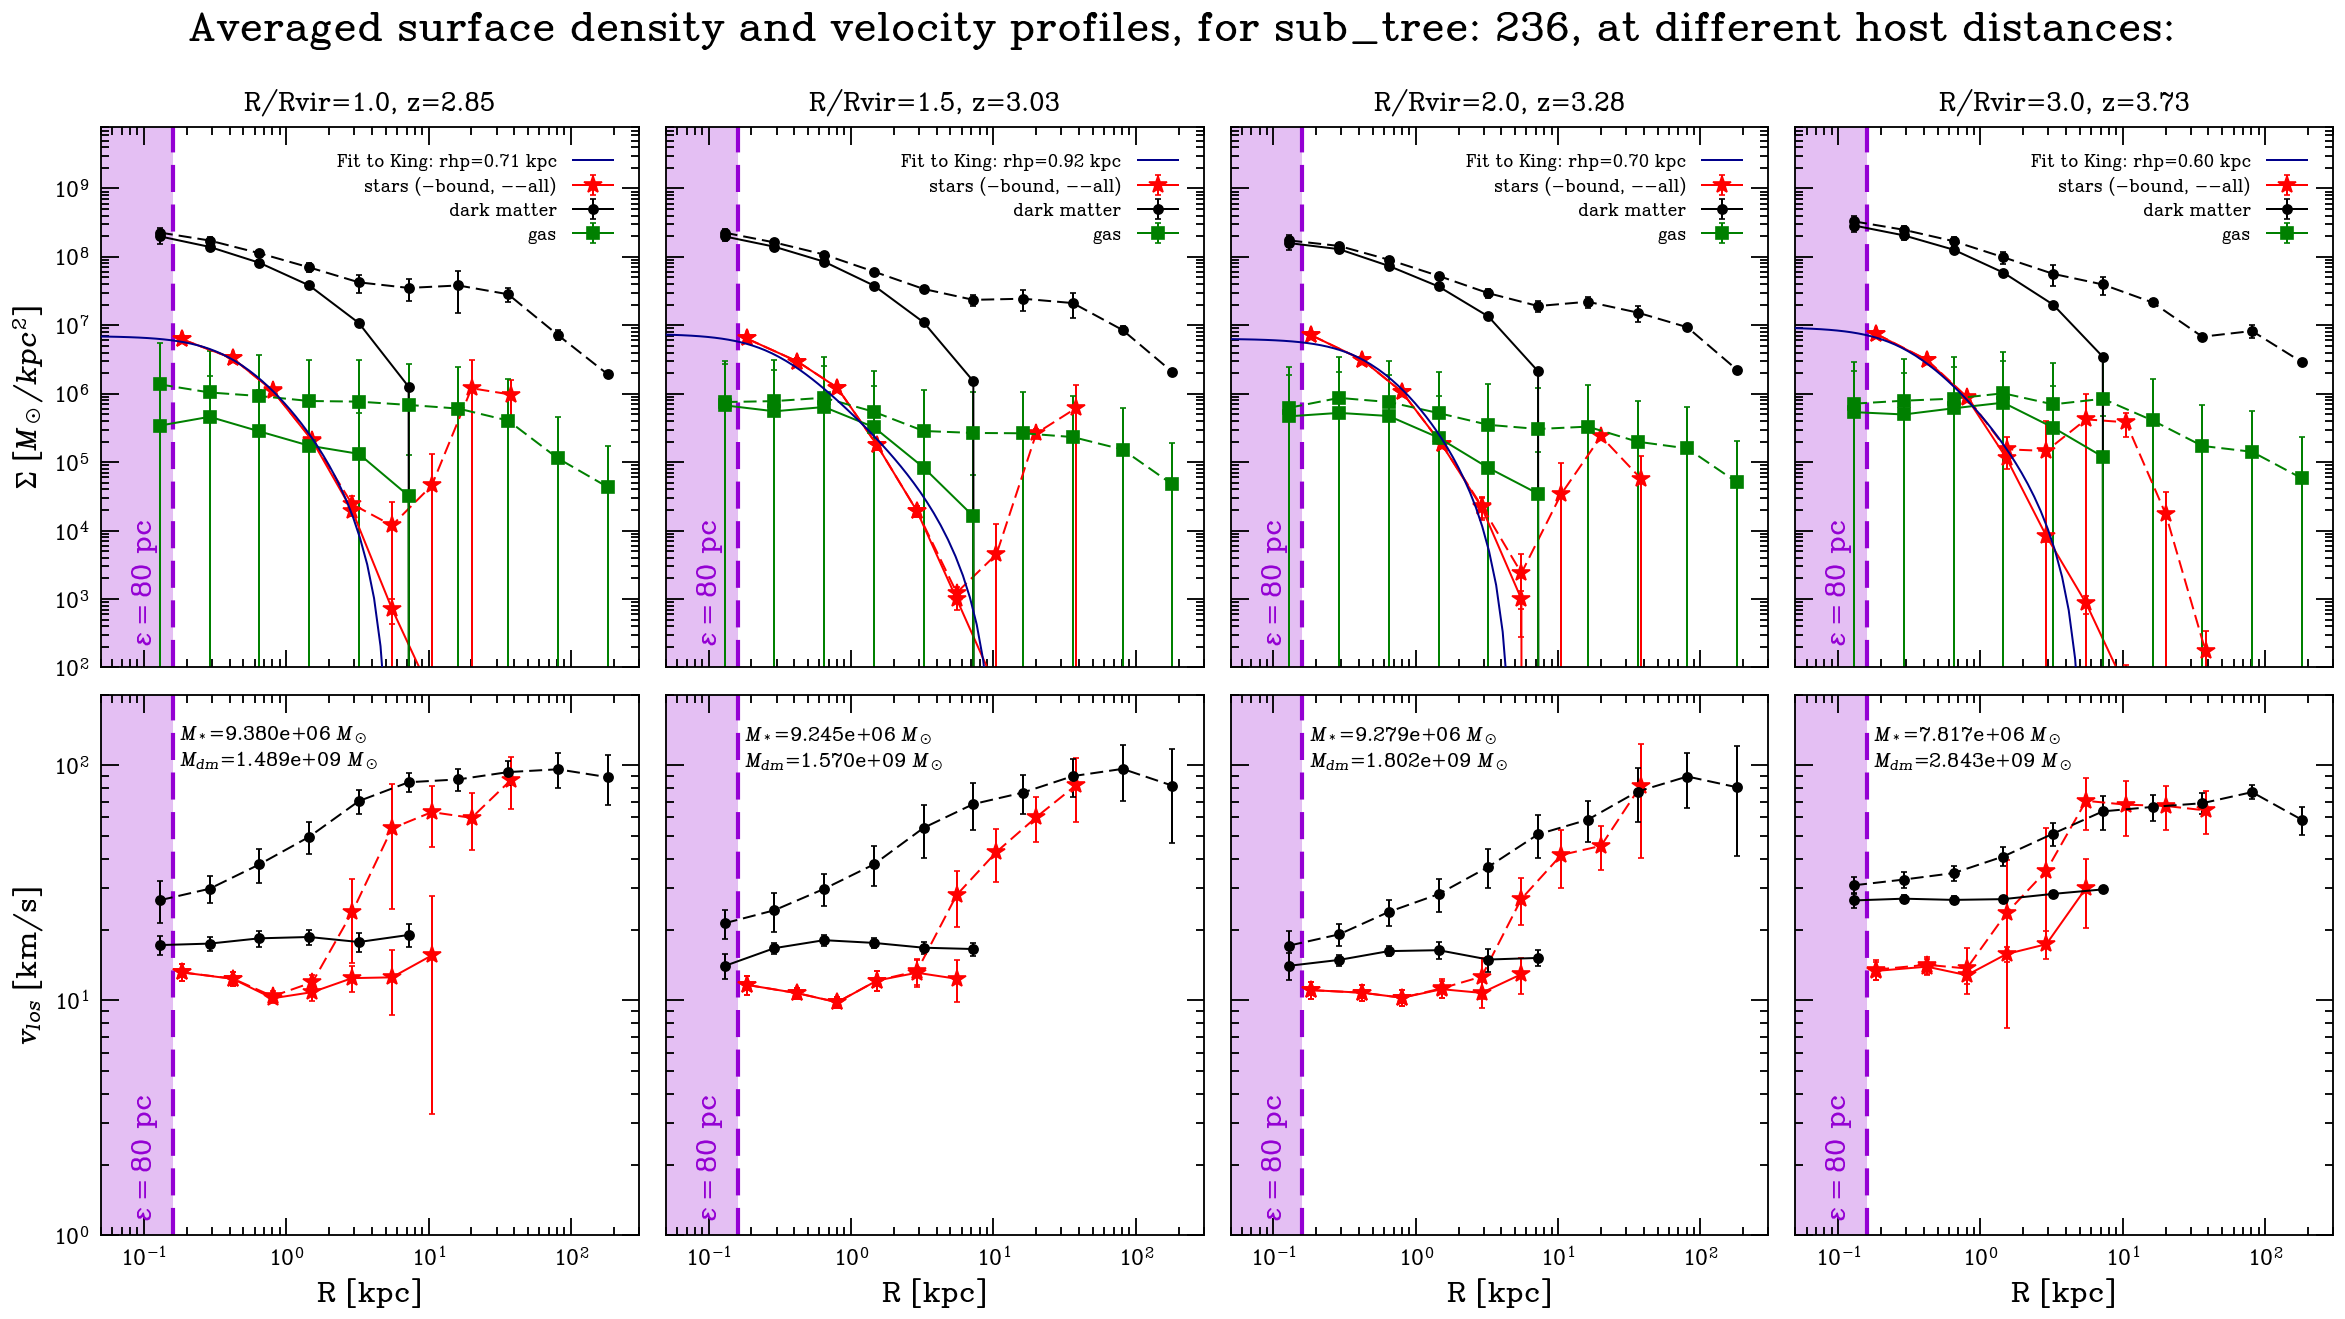

In [13]:
from src.explorer.class_methods import random_vector_spherical

double_fit = False
N = 10
proj_components = "all"
velocity_projection = "bins"

fig_name = f"subtree_{sub_id}_{velocity_projection}.png"
folder = "figs/profiles/"

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(2*12,12), sharex=True, sharey="row")
plt.subplots_adjust(hspace=0.05, wspace=0.05)

fig.suptitle(f"Averaged volumemetric density and velocity profiles, for sub_tree: {sub_id}, at different host distances:", y=0.96, fontsize=29, ha="center")


fig2, axes2 = plt.subplots(nrows=2, ncols=4, figsize=(2*12,12), sharex=True, sharey="row")
plt.subplots_adjust(hspace=0.05, wspace=0.05)

fig2.suptitle(f"Averaged surface density and velocity profiles, for sub_tree: {sub_id}, at different host distances:", y=0.96, fontsize=29, ha="center")


for i, rhost in enumerate([1.0, 1.5, 2.0, 3.0]):
    halo_params = select_from_params(params, rhost)
    
    axes[0, i].set_title(f"R/Rvir={rhost}, z={halo_params['redshift']:.2f}")
  
    halo = dge.SnapshotHalo("/media/asier/EXTERNAL_USBA/Cosmo_v18/" + halo_params["fns"], center=halo_params["center"], radius=halo_params["rvir"])
    halo.compute_bound_particles(
        components=["darkmatter"], 
        method="bh", 
        weighting="softmax", 
        T="adaptative", 
        verbose=False, 
        soft=[(80, 'pc')]
    )
    halo.compute_bound_particles(
        components=["stars", "darkmatter", "gas"], 
        method="bh", 
        weighting="softmax", 
        T=0.2, 
        verbose=False, 
        refine=False, 
        cm=halo.cm, 
        vcm=halo.vcm,
        soft=[(80, 'pc'), (80, 'pc'), (123, 'pc')]
    )
    
    result_dens = plot_voldens(axes[0, i], halo, components="all")
    bins = {c : result_dens[c]["bins"] for c in ["stars", "gas", "darkmatter"]}
    axes[0, i].loglog()
    axes[0, i].set_xlim(0.05, 300)
    axes[0, i].set_ylim(1E2, 8E9)
    
    axes[0, i].axvspan(0.0001, 2 * 0.08, color="darkviolet", alpha=0.25, ls="--", lw=0.01)
    axes[0, i].axvline(2 * 0.08, color="darkviolet", ls="--", lw=2.5)
    
    axes[0, i].text(0.08, 2E2, r"$\varepsilon=80$ pc" ,ha="left", va="bottom", color="darkviolet", rotation="vertical", fontsize=20)



    
    plot_dispvel(axes[1, i], halo, "all", bins)

    axes[1, i].set_yscale("log")
    axes[1, i].set_ylim(10, 400)

    axes[1, i].axvspan(0.0001, 2 * 0.08, color="darkviolet", alpha=0.25, ls="--", lw=0.01)
    axes[1, i].axvline(2 * 0.08, color="darkviolet", ls="--", lw=2.5)
    axes[1, i].text(0.08, 11.5, r"$\varepsilon=80$ pc" ,ha="left", va="bottom", color="darkviolet", rotation="vertical", fontsize=20)
    axes[1, i].text(0.18, 350, r"$M_*$="+f"{halo.stars.bmasses.sum().value:.3e}"+r" $M_\odot$"+"\n"+r"$M_{dm}$="+f"{halo.darkmatter.bmasses.sum().value:.3e}"+r" $M_\odot$" ,ha="left", va="top", color="black", rotation="horizontal", fontsize=14)

    axes[1, i].set_xlabel(f"r [kpc]", fontsize=20)

    if i==0:
        axes[0, i].set_ylabel(r"$\rho \ [M_\odot / kpc^3]$", fontsize=20)
        axes[1, i].set_ylabel(r"$v_{rms}$ [km/s]", fontsize=20)





    fit_params = densModel.make_params(
        W0={'value': 5.5,'min': 0.1,'max': np.inf,'vary': True},
        g={'value': 1, 'vary': False},
        M={'value': halo.stars.bmasses.sum().to("Msun").value, 'vary' : False},
        rh={'value': halo_params["rh3d_stars"][0], 'min': 1E-4, 'max': 50, 'vary': True}
    )
    result_stars = densModel.fit(r=result_dens["stars"]["r_bound"], data=result_dens["stars"]["rho_bound"], params=fit_params, nan_policy="omit") 
    k_stars = limepy(phi0=result_stars.params['W0'].value, 
            g=result_stars.params['g'].value, 
            M=result_stars.params['M'].value, 
            rh=result_stars.params['rh'].value, 
            G=4.300917270038e-06,
            project=True
            )
    
    axes[0, i].plot(k_stars.r, k_stars.rho, color="darkblue", zorder=10, label=f"Fit to King: W0={result_stars.params['W0'].value:.2f}±{result_stars.params['W0'].stderr:.0e},  rh={result_stars.params['rh'].value:.2f}±{result_stars.params['rh'].stderr:.0e} kpc")
    axes[1, i].plot(k_stars.r, np.sqrt(k_stars.v2), color="darkblue", zorder=10)

    rho_h = unyt_quantity(*halo_params["mass"]) / (4*np.pi/3 * unyt_quantity(*halo_params["rvir"]).to("kpc")**3)
    c = (unyt_quantity(*halo_params["rvir"]).to("kpc")/unyt_quantity(*halo_params["rs"]).to("kpc")).value
    r = np.logspace(np.log10(0.05), np.log10(300), 200)
    rho_nfw = NFWc(r, rho_h, c, unyt_quantity(*halo_params["rvir"]).to("kpc").value)
    axes[0, i].plot(r, rho_nfw, color="darkorange", label=f'NFW Rockstar Fit: c={c:.2f}, rvir={unyt_quantity(*halo_params["rvir"]).to("kpc").value:.2f} kpc', zorder=9)
    
    axes[0, i].legend(loc="upper right", fontsize=12, markerfirst=False, reverse=False)






    

    



    axes2[0, i].set_title(f"R/Rvir={rhost}, z={halo_params['redshift']:.2f}")

    lines_of_sight = random_vector_spherical(N, half_sphere=True)

    result_surf = plot_surfdens(axes2[0, i], halo, lines_of_sight, components=proj_components)
    bins = {c : result_surf[c]["bins"] for c in ["stars", "darkmatter", "gas"]}
    axes2[0, i].loglog()
    axes2[0, i].set_xlim(0.05, 300)
    axes2[0, i].set_ylim(1E2, 8E9)
    
    axes2[0, i].axvspan(0.0001, 2 * 0.08, color="darkviolet", alpha=0.25, ls="--", lw=0.01)
    axes2[0, i].axvline(2 * 0.08, color="darkviolet", ls="--", lw=2.5)
    
    axes2[0, i].text(0.08, 2E2, r"$\varepsilon=80$ pc" ,ha="left", va="bottom", color="darkviolet", rotation="vertical", fontsize=20)



    
    plot_losvel(axes2[1, i], halo, lines_of_sight, proj_components, bins, velocity_projection)

    axes2[1, i].set_yscale("log")
    axes2[1, i].set_ylim(1, 200)

    axes2[1, i].axvspan(0.0001, 2 * 0.08, color="darkviolet", alpha=0.25, ls="--", lw=0.01)
    axes2[1, i].axvline(2 * 0.08, color="darkviolet", ls="--", lw=2.5)
    axes2[1, i].text(0.08, 1.15, r"$\varepsilon=80$ pc" ,ha="left", va="bottom", color="darkviolet", rotation="vertical", fontsize=20)
    axes2[1, i].text(0.18, 150, r"$M_*$="+f"{halo.stars.bmasses.sum().value:.3e}"+r" $M_\odot$"+"\n"+r"$M_{dm}$="+f"{halo.darkmatter.bmasses.sum().value:.3e}"+r" $M_\odot$" ,ha="left", va="top", color="black", rotation="horizontal", fontsize=14)

    axes2[1, i].set_xlabel(f"R [kpc]", fontsize=20)

    if i==0:
        axes2[0, i].set_ylabel(r"$\Sigma \ [M_\odot / kpc^2]$", fontsize=20)
        axes2[1, i].set_ylabel(r"$v_{los}$ [km/s]", fontsize=20)


    if double_fit:
        fit_params = surfModel.make_params(
            W0={'value': 5.5,'min': 0.1,'max': np.inf,'vary': True},
            g={'value': 1, 'vary': False},
            M={'value': halo.stars.bmasses.sum().to("Msun").value, 'vary' : False},
            rh={'value': halo_params["rh3d_stars"][0], 'min': 1E-4, 'max': 50, 'vary': True}
        )
        result_stars = densModel.fit(r=result_surf["stars"]["r_bound"], data=result_surf["stars"]["rho_bound"], params=fit_params, nan_policy="omit") 
        k_stars = limepy(phi0=result_stars.params['W0'].value, 
                g=result_stars.params['g'].value, 
                M=result_stars.params['M'].value, 
                rh=result_stars.params['rh'].value, 
                G=4.300917270038e-06,
                project=True
                )
    
        axes2[0, i].plot(k_stars.r, k_stars.Sigma, color="darkblue", zorder=10, label=f"Fit to King: W0={result_stars.params['W0'].value:.2f}±{result_stars.params['W0'].stderr:.0e},  rh={result_stars.params['rh'].value:.2f}±{result_stars.params['rh'].stderr:.0e} kpc")

    axes2[0, i].plot(k_stars.r, k_stars.Sigma, color="darkblue", zorder=10, label=f"Fit to King: rhp={k_stars.rhp:.2f} kpc")







    
    axes2[0, i].legend(loc="upper right", fontsize=12, markerfirst=False, reverse=False)


fig.savefig(folder+"vol_"+fig_name, dpi=300, bbox_inches="tight")
fig2.savefig(folder+"surf_"+fig_name, dpi=300, bbox_inches="tight")

plt.show()
    